# Machine Learning: Decision Tree Analysis for Bank Customer Churn

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv("/Users/omar/Desktop/PROJECT PYTHON/DATASET/Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [12]:
# Checking for missing values

In [23]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [14]:
# Following best practices, we are make sure that we dont have any duplicate data in our dataset, that in this case we have 4 records. 

In [24]:
df.duplicated().sum()

4

In [16]:
# We are going to remove these duplicates values and now we have 10,000 records, deleting the 4 records duplicated

In [25]:
df.drop_duplicates(inplace=True)
print("Duplicates removed, new shape:", df.shape)

Duplicates removed, new shape: (10000, 18)


In [26]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [19]:
# It will be removed the unnecesary column "RowNumber"

In [27]:
df.drop(['RowNumber'], axis=1, inplace=True)
print("Column removed, new shape:", df.shape)

Column removed, new shape: (10000, 17)


In [21]:
# We confirmed that has been removed the RowNumber and is not affected the performance of the code.

In [28]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [23]:
# We are going to check our DataTypes in this dataset for know if we need to change something

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [25]:
# Following with best practices we will rename our columns following the "snake_case" variable style.
# is important for readibility and keep lowercase all our information

In [30]:
df.rename(columns={
    'CustomerId': 'customer_id',
    'Surname': 'surname',
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure_years',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'has_exited',
    'Complain': 'complain',
    'Satisfaction Score': 'satisfaction_score',
    'Card Type': 'card_type',
    'Point Earned': 'points_earned'
}, inplace=True)

In [27]:
# We checking that all the names has been recorded successfully

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   surname             10000 non-null  object 
 2   credit_score        10000 non-null  int64  
 3   geography           10000 non-null  object 
 4   gender              10000 non-null  object 
 5   age                 10000 non-null  int64  
 6   tenure_years        10000 non-null  int64  
 7   balance             10000 non-null  float64
 8   num_of_products     10000 non-null  int64  
 9   has_credit_card     10000 non-null  int64  
 10  is_active_member    10000 non-null  int64  
 11  estimated_salary    10000 non-null  float64
 12  has_exited          10000 non-null  int64  
 13  complain            10000 non-null  int64  
 14  satisfaction_score  10000 non-null  int64  
 15  card_type           10000 non-null  object 
 16  points_ea

# Data Exploratory

In [29]:
# Is important to know about the behaviour of our TOP customers at the Bank, for know what we are doing well with customers
# and they stay using our credit cards
# First i have sorted the data based in the number "points_earned", this one show when a customer
# is buying constanstly with the credit card.

In [32]:
df.sort_values(by="points_earned", ascending=False).head(20)

,customer_id,surname,credit_score,geography,gender,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,card_type,points_earned
1249,15803681,Sims,803,France,Female,26,4,0.00,2,1,1,181208.47,0,0,2,DIAMOND,1000
8917,15804962,Nnaife,606,France,Male,36,1,155655.46,1,1,1,192387.51,1,1,4,DIAMOND,1000
8510,15616833,Wang,678,Spain,Male,27,2,0.00,2,1,1,13221.25,0,0,4,GOLD,1000
4273,15707132,Yudin,465,France,Male,33,5,0.00,2,0,1,78698.09,0,0,5,GOLD,1000
4289,15657529,Chin,714,Germany,Male,53,1,99141.86,1,1,1,72496.05,1,1,3,PLATINUM,1000
2877,15585284,Thomson,604,Spain,Female,35,7,147285.52,1,1,1,57807.05,0,0,5,PLATINUM,1000
2012,15726267,Paterson,570,France,Male,32,9,117337.54,2,0,1,62810.91,0,0,4,DIAMOND,1000
9752,15591985,Stewart,708,France,Female,51,8,70754.18,1,1,1,92920.04,1,1,2,PLATINUM,1000
9226,15667944,Onuchukwu,679,France,Male,39,0,86843.61,1,0,1,159830.58,0,0,5,PLATINUM,1000
2850,15579262,Shearston,497,France,Male,41,9,0.00,1,0,0,22074.48,0,0,1,PLATINUM,1000


In [31]:
# We want to know who is the gender that is using more the credit card and we use a sort by gender
# with our TOP 20 customers with more points earned.

In [33]:
top_20_customers_by_points_earned = df.sort_values(by="points_earned", ascending=False).head(20)
gender_counts = top_20_customers_by_points_earned['gender'].value_counts()
display(gender_counts)

gender
Male      13
Female     7
Name: count, dtype: int64

In [33]:
# The number of Males is 85.71% greater than the number of females.

/var/folders/38/_48h3_750y9fzd7plplfrs840000gn/T/ipykernel_86410/2995561288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=palette)


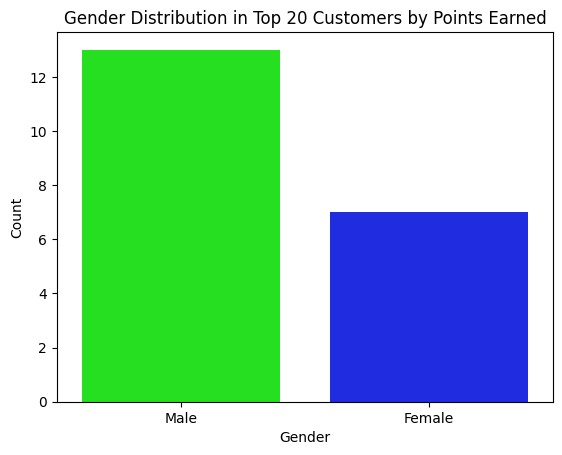

In [34]:
gender_counts = {'Male': 13, 'Female': 7}
gender_counts = pd.Series(gender_counts)
palette = sns.color_palette("hsv", len(gender_counts))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=palette)
plt.title('Gender Distribution in Top 20 Customers by Points Earned')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [52]:
# The histogram above displays the distribution of ages among our bank's customers, with the data divided into 20 bins to provide a clear view of the distribution's 
# shape and spread.
# The graph peaks around the 30 to 40 age range, suggesting that the majority of the customers are in this range of age. 

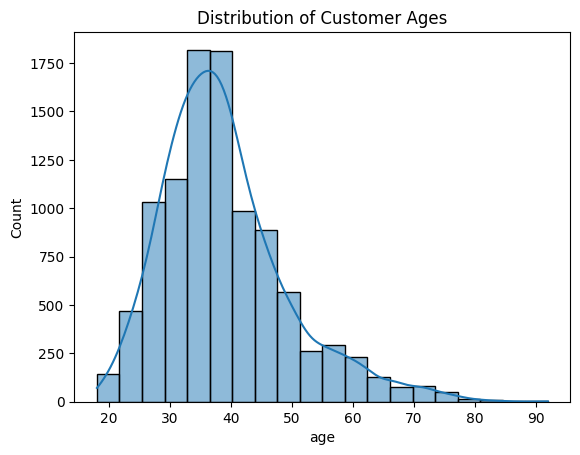

In [35]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.show()

In [54]:
# There is a significant spike at the lower end of the balance scale, particularly at or near zero. 
# This suggests that a large number of customers have very low or zero balances in their accounts.
# Peaks start around $100,000 and decrease in $200,000

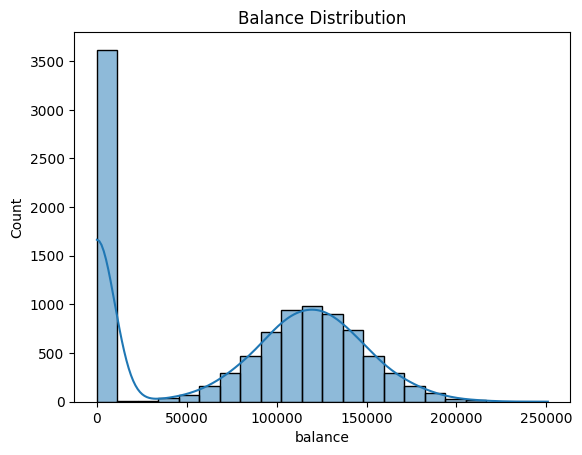

In [36]:
sns.histplot(df['balance'], kde=True)
plt.title('Balance Distribution')
plt.show()

In [56]:
# We are going to use a boxplot to analyze the distribution of credit scores across different genders. 
# The boxplot is an excellent visualization tool for this purpose, This enables us to quickly ascertain 
# not only the typical values but also the variability and extremities in our customers' credit scores.

#The median credit scores between male and female customers are strikingly similar, suggesting that there are no significant 
# gender-based differences in how credit scores are distributed amongst the customers of the bank
# show consistent spread of credit scores among males and females.

/var/folders/38/_48h3_750y9fzd7plplfrs840000gn/T/ipykernel_86410/156662029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='credit_score', data=df, palette=palette)


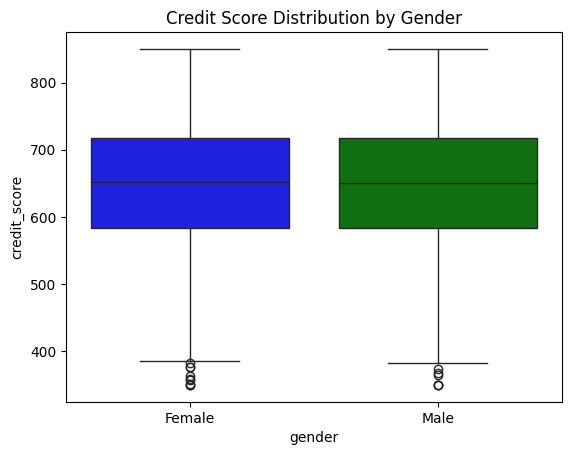

In [37]:
palette = {"Male": "green", "Female": "blue"}
sns.boxplot(x='gender', y='credit_score', data=df, palette=palette)
plt.title('Credit Score Distribution by Gender')
plt.show()

In [ ]:
# We need to give a look for know how many customers the bank has lost in difference with the customers that stay

In [38]:
df['has_exited'].value_counts()

has_exited
0    7962
1    2038
Name: count, dtype: int64

In [ ]:
# The graphic represent the values found following the Binary number system, we identify "0" as "No" and "1" as "Yes"
# While the majority of customers (79.62%) choose to stay with the bank, there is a significant portion, nearly 20.38%, that is opting to leave.

/var/folders/38/_48h3_750y9fzd7plplfrs840000gn/T/ipykernel_86410/440006325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['has_exited'].value_counts().index, y=df['has_exited'].value_counts().values, palette=['green', 'red'])


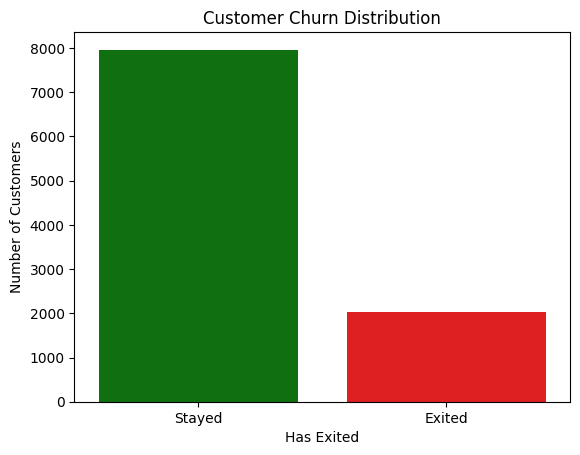

In [39]:
sns.barplot(x=df['has_exited'].value_counts().index, y=df['has_exited'].value_counts().values, palette=['green', 'red'])
plt.title('Customer Churn Distribution')
plt.xlabel('Has Exited')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Stayed', 'Exited'])  # Label x-axis for clarity
plt.show()

# Correlation

In [ ]:
# Is important to establish the correlation, for do this i need to choose the specific columns data type for get a good outcome
# In this moment our data types is a mix between objects, integers and float.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   surname             10000 non-null  object 
 2   credit_score        10000 non-null  int64  
 3   geography           10000 non-null  object 
 4   gender              10000 non-null  object 
 5   age                 10000 non-null  int64  
 6   tenure_years        10000 non-null  int64  
 7   balance             10000 non-null  float64
 8   num_of_products     10000 non-null  int64  
 9   has_credit_card     10000 non-null  int64  
 10  is_active_member    10000 non-null  int64  
 11  estimated_salary    10000 non-null  float64
 12  has_exited          10000 non-null  int64  
 13  complain            10000 non-null  int64  
 14  satisfaction_score  10000 non-null  int64  
 15  card_type           10000 non-null  object 
 16  points_ea

In [ ]:
# For achieve the correlation calculation, will take just inte64 and float64

In [41]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Compute the correlation matrix
df_numeric.corr()

,customer_id,credit_score,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,points_earned
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
tenure_years,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
num_of_products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
has_credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
is_active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
has_exited,-0.006203,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628


In [81]:
#Analysis of Correlation Matrix
# In the correlation matrix, each cell provides the correlation coefficient between two variables. 
# A correlation coefficient close to 1 suggests a strong positive relationship, close to -1 indicates a strong negative relationship, 
# and around 0 indicates no relationship.

# Churn and Other Attributes:
# Has Exited has a noticeable positive correlation with Complain (0.995693), which suggests that customers who have complaints 
# are significantly more likely to churn. This is an essential insight as it directly ties customer dissatisfaction to churn.

# Tenure Years has a negative correlation with Has Exited (-0.013656), although very weak, 
# suggesting customers with longer tenure are slightly less likely to churn.

# Num of Products and Has Exited also show a notable negative correlation (-0.046357), 
# indicating that customers with more products are less likely to leave, possibly due to higher engagement with the bank.







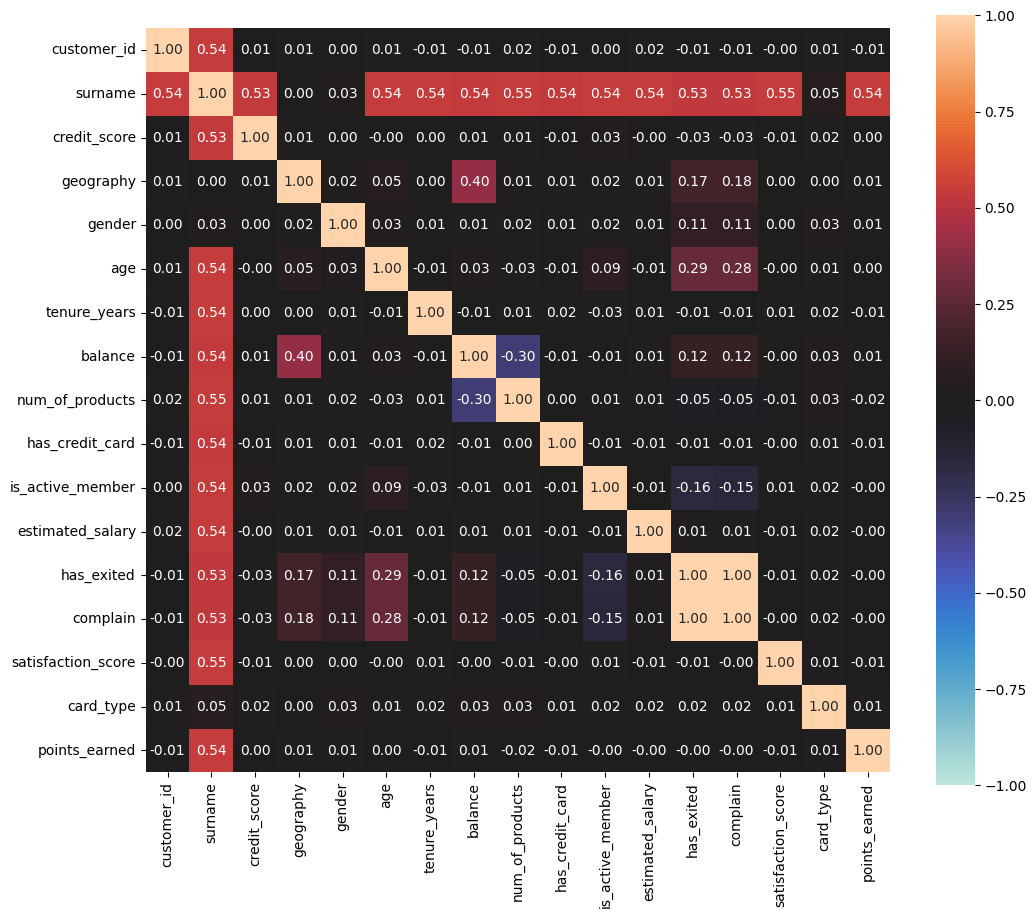

{'corr':                     customer_id   surname  credit_score  geography    gender  \
 customer_id            1.000000  0.542992      0.005308   0.007819  0.002641   
 surname                0.542992  1.000000      0.533637   0.000000  0.026769   
 credit_score           0.005308  0.533637      1.000000   0.008939  0.002857   
 geography              0.007819  0.000000      0.008939   1.000000  0.022178   
 gender                 0.002641  0.026769      0.002857   0.022178  1.000000   
 age                    0.009497  0.540171     -0.003965   0.049154  0.027544   
 tenure_years          -0.014883  0.540418      0.000842   0.003942  0.014733   
 balance               -0.012419  0.538557      0.006268   0.401114  0.012087   
 num_of_products        0.016972  0.545434      0.012238   0.011981  0.021859   
 has_credit_card       -0.014025  0.535501     -0.005458   0.014951  0.005766   
 is_active_member       0.001665  0.540356      0.025651   0.023032  0.022544   
 estimated_salary   

In [42]:
from dython.nominal import associations
associations(df, figsize=(12, 10))

In [83]:
# Ideal attributes for Predictive Modeling:

# Considering the correlations related to churn, it would be advisable to focus on attributes that
# show significant relationships. Based on your correlation analysis, the attributes that stand out for predicting churn would be:

# - Complain (0.995693)
# - Num of Products (-0.046357)
#-  Age (0.285296)
# - Balance (-0.304180)

# These attributes reflect different aspects of customer behavior and their relationship with the bank, which are crucial 
# for understanding the likelihood of a customer deciding to leave.

In [87]:
# After identify the most important attributes for our predictive model.

# I will remove the columns that we wont need for improve the performance of our project and with a head(10) for verify that everything is correct

In [43]:
df.head(1)

,customer_id,surname,credit_score,geography,gender,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,card_type,points_earned
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [44]:
df_churn = df.drop(columns=['customer_id', 'surname', 'credit_score', 'geography', 
                    'gender', 'tenure_years', 'has_credit_card', 'is_active_member',
                    'estimated_salary','satisfaction_score', 'card_type', 'points_earned'])
df_churn.head(10)

,age,balance,num_of_products,has_exited,complain
0,42,0.00,1,1,1
1,41,83807.86,1,0,1
2,42,159660.80,3,1,1
3,39,0.00,2,0,0
4,43,125510.82,1,0,0
5,44,113755.78,2,1,1
6,50,0.00,2,0,0
7,29,115046.74,4,1,1
8,44,142051.07,2,0,0
9,27,134603.88,1,0,0


In [108]:
# To verify that all the information and isngiths is correct, we will display our correlations in df_churn.

In [45]:
df_churn.corr()

,age,balance,num_of_products,has_exited,complain
age,1.000000,0.028308,-0.030680,0.285296,0.283530
balance,0.028308,1.000000,-0.304180,0.118577,0.119124
num_of_products,-0.030680,-0.304180,1.000000,-0.047611,-0.046357
has_exited,0.285296,0.118577,-0.047611,1.000000,0.995693
complain,0.283530,0.119124,-0.046357,0.995693,1.000000


In [ ]:
# We will use unstack and sort values, that is a good technique for visualize of a way more simple all our correlations

In [46]:
correlation_matrix = df_churn.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

age              age                1.000000
                 balance            0.028308
                 num_of_products   -0.030680
                 has_exited         0.285296
                 complain           0.283530
balance          age                0.028308
                 balance            1.000000
                 num_of_products   -0.304180
                 has_exited         0.118577
                 complain           0.119124
num_of_products  age               -0.030680
                 balance           -0.304180
                 num_of_products    1.000000
                 has_exited        -0.047611
                 complain          -0.046357
has_exited       age                0.285296
                 balance            0.118577
                 num_of_products   -0.047611
                 has_exited         1.000000
                 complain           0.995693
complain         age                0.283530
                 balance            0.119124
          

In [47]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

balance          num_of_products   -0.304180
num_of_products  balance           -0.304180
has_exited       num_of_products   -0.047611
num_of_products  has_exited        -0.047611
complain         num_of_products   -0.046357
num_of_products  complain          -0.046357
                 age               -0.030680
age              num_of_products   -0.030680
                 balance            0.028308
balance          age                0.028308
                 has_exited         0.118577
has_exited       balance            0.118577
complain         balance            0.119124
balance          complain           0.119124
complain         age                0.283530
age              complain           0.283530
has_exited       age                0.285296
age              has_exited         0.285296
has_exited       complain           0.995693
complain         has_exited         0.995693
age              age                1.000000
num_of_products  num_of_products    1.000000
balance   

In [ ]:
# For the process of predictive model is neccesary that all our values are numerical
# Following best practice we will explore with info() the details of our data types.

In [48]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              10000 non-null  int64  
 1   balance          10000 non-null  float64
 2   num_of_products  10000 non-null  int64  
 3   has_exited       10000 non-null  int64  
 4   complain         10000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 468.8 KB


In [111]:
# The dataset is ready for our predictive model and we dont need to do a change of data type from object or str to numerical values

# Note: If you find the issue where you have data in Str or object. You can use map() function, for achieve solve the issue.

# Example: has_exited and complain are objects and appear the words Yes and No, and we need to replace it.

# df_churn['has_exited'] = df_churn['has_exited'].map({'Yes': 1, 'No': 0})
# df_churn['complain'] = df_churn['complain'].map({'Yes': 1, 'No': 0})

# And after you can check the outcome with the following query

# print(df_churn['has_exited'].value_counts())
# print(df_churn['complain'].value_counts())

# Following best practice, i create a new dataframe called "df_numbers" that will be a copy of "df_churn", so i dont affect
# my original data of "df_churn" and i can call the information in anytime.



In [49]:
df_numbers=df_churn.copy()
df_numbers.head(10)

,age,balance,num_of_products,has_exited,complain
0,42,0.00,1,1,1
1,41,83807.86,1,0,1
2,42,159660.80,3,1,1
3,39,0.00,2,0,0
4,43,125510.82,1,0,0
5,44,113755.78,2,1,1
6,50,0.00,2,0,0
7,29,115046.74,4,1,1
8,44,142051.07,2,0,0
9,27,134603.88,1,0,0


In [112]:
# Now we are ready for our Predictive Model using our new dataframe "df_numbers"

# Model Building

In [ ]:
# In this stage where will develop the predictive model "Decision Tree", we are going to need new additional libraries

# SKLEARN
# PyDotPlus: Is improved version of the old pydot project. We need install. pip install pydotplus
# GraphViz: this library is neccesary for render the graphs into any of the plethora of output formats supported. pip install graphviz + brew install graphviz
# SIX

In [ ]:
# We will import the train test split from SKLEARN

In [50]:
from  sklearn.model_selection import train_test_split

In [ ]:
# Splitting my dataframe into 2 dataframes: "X" (Variables: Train data) and "Y" (Target: CHURN) 

In [77]:
# Train Data
inputs = df_numbers[['age', 'balance', 'num_of_products', 'complain']]

# Target
target = df_numbers['has_exited']

# Split the dataset into training and testing sets
# We confirm that all the columns has been placed and is not included the target.
features= list(inputs.columns)
print(features)

['age', 'balance', 'num_of_products', 'complain']


In [117]:
# Training the Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
model = model.fit(inputs,target)

In [1]:
# importing neccesary libraries for Decision Tree

In [80]:
from IPython.display import Image  
from six import StringIO  

from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [5]:
# Now we are going to printing the decision tree

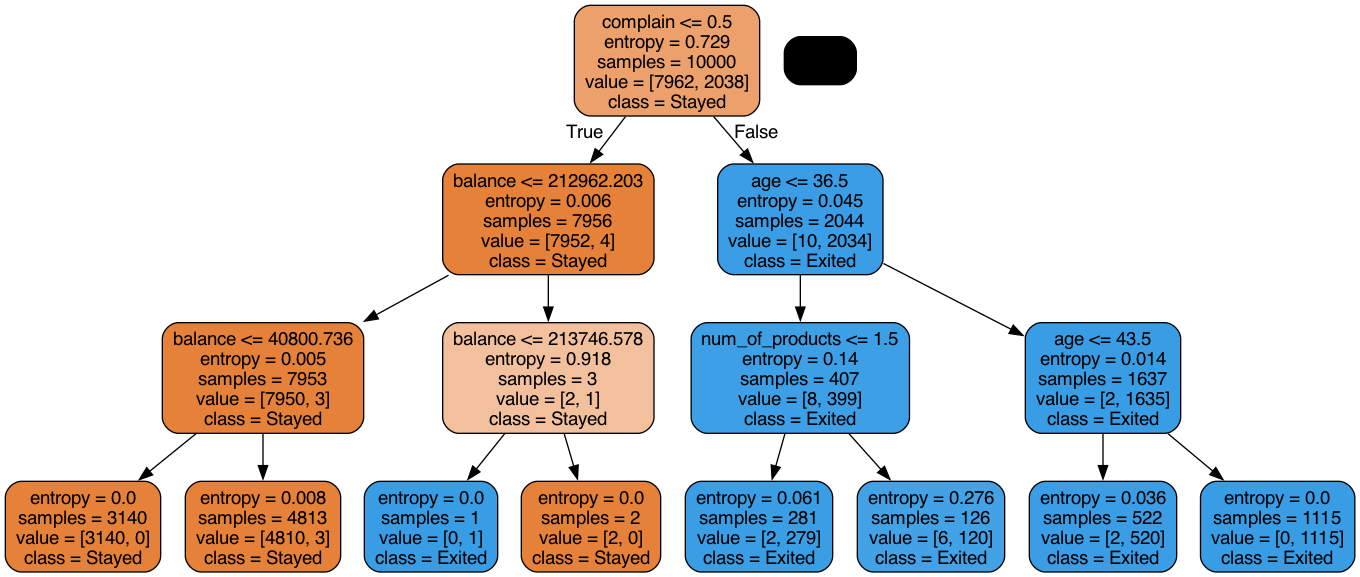

In [81]:
# StringIO: "This module implements a file-like class that reads and writes a string buffer (also known as memory files).
dot_data = StringIO()  

# Function to generate the graphic of decision tree
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                feature_names=features, 
                class_names=["Stayed", "Exited"])

# Load graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# #Create PNG image
Image(graph.create_png(),width=800,height=900)


In [57]:
# Explanation

In [58]:
# Depth 0: Complain

# the ROOT node is "Complain" that show the question Is the number of complaints less than or equal to 0.5? This essentially 
# asks if the customer has complained half the time or less frequently.

# What it would be the outcomes:

# True Path (Yes): Customers with fewer or no complaints predominantly do not churn (class = Stayed).
# False Path (No): Leads to further evaluations based on other attributes. 

# Depth 1: Following the 'True' path from the root, we examine the 'Balance'. If the balance is ≤ 212,962.203,
# most customers do not churn.

# Depth 2: We need to evaluate "num of products" and "age"

# Depth 3 (Final Stage): In this depth, we observe the final criteria used to classify customers as either
# staying with the bank or exiting. Specifically, the decision branches that culminate at this depth focus on 
# finer details such as age and balance to make this determination.


In [59]:
# to save Decision Tree in PDF Format

In [60]:
# #graph.write_pdf("DecisionTree.pdf")

In [61]:
# To save Decision Tree in PNG Format

In [62]:
#graph.write_png("DecisionTree.png")

In [64]:
# Our Decision Tree model has demonstrated outstanding performance, 
# achieving an accuracy of 99.87% on the training dataset. This high level of accuracy indicates that the model is 
# exceptionally effective in predicting whether customers will churn based on the input features provided.

In [82]:
model.score(inputs, target)

0.9987

# Testing

In [ ]:
# Now that the decision tree model is trained, it's essential to test its predictive capability with sample data. 
# This will help us understand how well the model performs in making predictions based on various 
# customer profiles. Below, we define the conditions for testing based on our dataset's specific attributes:

In [70]:
# - Age: Any positive integer
# - Balance: Anye positive number
# - Number of products: Any integer from 1 to a maximum observed in the dataset
# - Complain: Indicates whether the customer has lodged complaints, with '0' representing 'No' and '1' representing 'Yes'.
# - Churn (Target Variable): This is what the model predicts; '0' for customers who stay (No Churn) and '1' for customers who exit (Churn).

In [85]:
# Test 1 

In [86]:
# Customer Profile for Test Scenario
# - Age: 45 years old
# - Account Balance: $50,000, indicating a high level of financial engagement with the bank.
# - Number of Products: 3,suggesting a diverse use of the bank's offerings.
# - Complaint History: No complais

In [ ]:
# Scenario Description: A 45-year-old customer with a substantial account balance of $50,000, 
# who utilizes three of the bank's products and has not lodged any complaints, is evaluated to predict churn likelihood.

In [84]:
test_input = pd.DataFrame([[45, 50000, 3, 0]], columns=['age', 'balance', 'num_of_products', 'complain'])

# Use the model to make a prediction
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [0]


In [87]:
# The output is 'Prediction: [0]', it indicates that the customer is not likely to CHURN based on their profile. 
# This suggests that customers with a higher balance, multiple products, and no complaints are generally more content 
# and less likely to leave the bank

In [88]:
# Test 2

In [90]:
# Customer Profile for Test Scenario
# - Age: 30 years old.
# - Account Balance: $1,200, indicating a lower level of financial engagement with the bank.
# - Number of Products: 1, suggesting limited use of the bank's services.
# - Complaint History: Has lodged complaints.

In [91]:
# Scenario Description: A 30-year-old customer with a modest account balance of $1,200, 
# who uses only one of the bank's products and has a history of complaints, is evaluated to predict churn likelihood.

In [92]:
test_input = pd.DataFrame([[30, 1200, 1, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


In [93]:
# This result suggests that the customer is likely to CHURN. This scenario highlights the risk factors associated 
# with lower engagement and customer dissatisfaction, which contribute to a higher likelihood of leaving the bank.

In [94]:
# Test 3

In [95]:
# Customer Profile for Test Scenario
# - Age: 37 years old
# - Account Balance: $15,000, indicating a moderate level of financial involvement with the bank.
# - Number of Products: 2, showing a fair utilization of the bank’s services.
# - Complaint History: No complaints

In [96]:
# Scenario Description: A customer who is 37 years old with a decent account balance of $15,000, 
# holds two of the bank's products, and has not lodged any complaints, is assessed to understand their likelihood of churning.

In [97]:
test_input = pd.DataFrame([[37, 15000, 2, 0]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [0]


In [98]:
# This result indicates that the customer is not likely to churn. This test underscores that moderate financial 
# engagement and satisfaction with bank services (evidenced by no complaints) are crucial 
# factors that might encourage customers to stay with the bank longer.

In [99]:
# Test 4

In [101]:
# Customer Profile for Test Scenario
# - Age: 45 years old
# - Account Balance: $100,000, indicating a high level of financial engagement with the bank.
# - Number of Products: 1, suggesting limited diversity in bank product usage despite significant funds.
# - Complaint History: Has lodged complaints

In [ ]:
# Scenario Description:: 45-year-old customer with a substantial bank balance of $100,000 but limited product 
# diversity and a history of complaints.

In [100]:
test_input = pd.DataFrame([[45, 100000, 1, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


In [102]:
# The output indicates that the customer is likely to churn. Despite a high balance, 
# the combination of limited product diversity and a history of complaints contributes to a higher churn risk. 

In [103]:
# Test 5

In [107]:
# Customer Profile for Test Scenario
# - Age: 25 years old
# - Account Balance: $140,000, showing significant financial involvement with the bank.
# - Number of Products: 3, indicating a broad engagement across the bank's product offerings.
# - Complaint History: Has lodged complaints

In [ ]:
# Scenario Description: A young customer who is 25 years old with a high account balance of $140,000, 
# utilizes 3 of the bank's products, and has lodged complaints.

In [106]:
test_input = pd.DataFrame([[25, 140000, 3, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


In [ ]:
# The output 'Prediction: [1]' indicates that the customer is likely to churn. 
# Despite having a high balance and using multiple products, the presence of complaints
# suggests significant dissatisfaction, which heavily influences the likelihood of churn.